# **Importing Section**

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
df = pd.read_csv('heart.csv')
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# **Exploriation Section**

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.describe(include = 'all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Summary**

>

**Variables Indication**
*   cp - chest pain type
*   restecg - resting electrocardiographic result
*   thall - thalassemia 
*   fbs - fasting blood sugar
*   exang - exercise induced angina
*   ca - number of major vessels (0-3) colored by flourosopy
*   thalachh - maximum heart rate achieved
*   trtbps - resting blood pressure



*   There is 14 column and 303 rows.
*   There are 9 Categorical Columns => sex, cp, fbs, restecg, exng, slp, caa, thall, output => columns are categorical data.
*   age, thalachh, trtbps, chol, oldpeak columns are input data.
*   There is one row duplicated data
*   There is no null values


*   sex - sex (1 = male; 0 = female)
*   cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
*   fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
*   restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
*   exng - exercise induced angina (1 = yes; 0 = no)
*   slp - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
*   caa- number of major vessels (0-3) colored by flourosopy
*   thall - 2 = normal; 1 = fixed defect; 3 = reversable defect   

# **Cleaning Section**

This list is holding variables going to convert to categorical dtype 


In [ ]:
category_columns = ['cp', 'fbs', 'restecg', 'exng','slp','caa','thall','output']
df[category_columns] = df[category_columns].astype('category')
df[category_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       303 non-null    category
 1   fbs      303 non-null    category
 2   restecg  303 non-null    category
 3   exng     303 non-null    category
 4   slp      303 non-null    category
 5   caa      303 non-null    category
 6   thall    303 non-null    category
 7   output   303 non-null    category
dtypes: category(8)
memory usage: 3.5 KB


Droping one duplicated row

In [ ]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [ ]:
sns.set_style("whitegrid")

# **Lets gooo**

> ## Women are the one third of this population

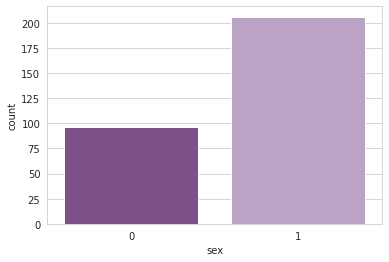

In [ ]:
sns.countplot(x='sex',data=df)

>In this dataset, men are douple of women in this observation. 

> ## What is the more frequent ages in this dataset?

29

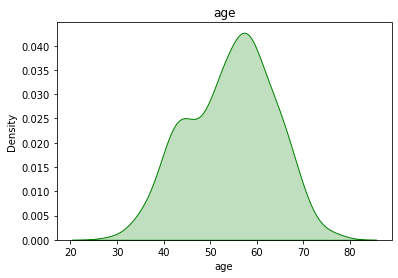

In [19]:
kde_age = df['age']
sns.kdeplot(kde_age, color='green', shade=True).set(title="age")
df['age'].min()

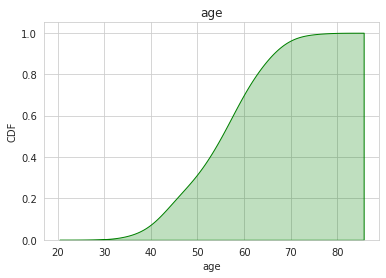

In [ ]:
kde_age = df['age']
sns.kdeplot(kde_age, color='green', shade=True, cumulative=True).set(title="age")
plt.ylabel('CDF')
plt.show()

>Okay then, we can observe that most of our dataset is arranging from 50 to 60 years old






> ## Is there a Relationship between Age and chestpain (cp)?




cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)


[Text(0.5, 1.0, 'chest pain type')]

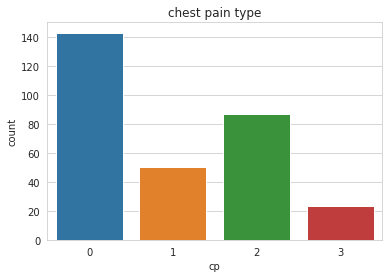

In [21]:
sns.countplot(x='cp', data=df).set(title="chest pain type")

> That being ploted(lol), the most of the dataset doesnt have any chest problems الحمدلله

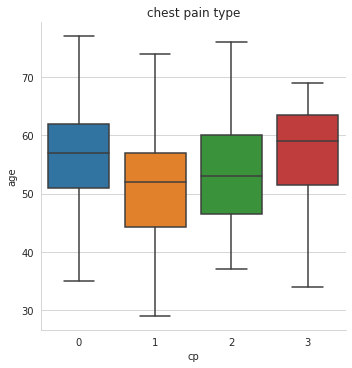

In [23]:
sns.catplot(x='cp', y='age' ,kind='box' ,data=df).set(title="chest pain type")

> cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)


> * that all ages (ranges between 30 and more than 70 years old) can have angina, either typical angina or atypical 
* we also can see that typical angina  is more frequent than other againas
* Also typical angina most ranges between patient who ages between 45 to 57 
* For atypical, it mostly ranges between 57 to 60 years old

> ## What is the most Frequent (maximum heart rate achieved) for both genders?




[Text(0.5, 1.0, 'maximum heart rate achieved')]

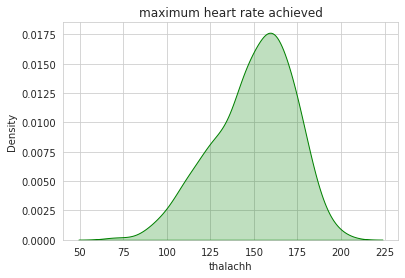

In [ ]:
kde_thalachh = df['thalachh']
sns.kdeplot(kde_thalachh, color='green', shade=True).set(title="maximum heart rate achieved")

[Text(0.5, 1.0, 'maximum heart rate achieved')]

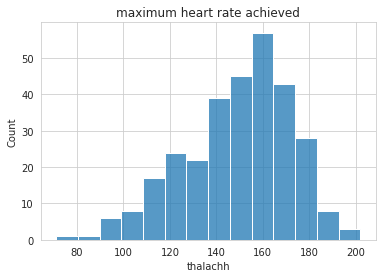

In [ ]:
sns.histplot(data=df,x=df['thalachh']).set(title="maximum heart rate achieved")

> okay then, the observation here is the most frequent heart rate achived is nearly 160

> ## How the age affects the maximum heart rate achieved for both males and females?
multivarient thalachh with age


Text(0.5, 1.03, 'maximum heart rate achieved')

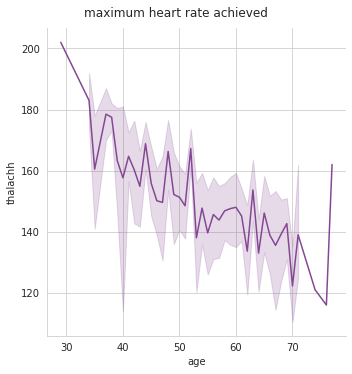

In [ ]:
sns.relplot(x='age', y='thalachh',data=df, kind="line").fig.suptitle("maximum heart rate achieved",y=1.03)

*   It's known for the maximum heart rate achieved is the more you got older, the more your heart beat slow down, it's both for the two genders doenst matter being male or female.

